### Advanced Pandas Method

In [1]:
import pandas as pd

Configuring options

In [7]:
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

Working with strings

In [16]:
names = pd.Series(['Pomeray, CODY ', ' Wagner; Jarry', 'smith, Ray'])

In [17]:
names = names.str.replace(';', ',')
names

0    Pomeray, CODY 
1     Wagner, Jarry
2        smith, Ray
dtype: object

In [18]:
names.str.len()

0    14
1    14
2    10
dtype: int64

In [19]:
names = names.str.strip()
names.str.len()

0    13
1    13
2    10
dtype: int64

In [21]:
names = names.str.lower()
names

0    pomeray, cody
1    wagner, jarry
2       smith, ray
dtype: object

In [22]:
names = names.str.split(', ')
names

0    [pomeray, cody]
1    [wagner, jarry]
2       [smith, ray]
dtype: object

In [23]:
names = pd.Series([i[::-1] for i in names])
names

0    [cody, pomeray]
1    [jarry, wagner]
2       [ray, smith]
dtype: object

In [24]:
names = [' '.join(i) for i in names]
names

['cody pomeray', 'jarry wagner', 'ray smith']

Working with time-series

In [25]:
daterange = pd.period_range('1/1/2020', freq='30d', periods=4)

In [26]:
date_df = pd.DataFrame(data=daterange, columns=['sample date'])
date_df

,sample date
0,2020-01-01
1,2020-01-31
2,2020-03-01
3,2020-03-31


In [27]:
date_df['date difference'] = date_df['sample date'].diff(periods=1)
date_df

,sample date,date difference
0,2020-01-01,NaT
1,2020-01-31,<30 * Days>
2,2020-03-01,<30 * Days>
3,2020-03-31,<30 * Days>


In [28]:
date_df['first of month'] = date_df['sample date'].values.astype('datetime64[M]')
date_df

,sample date,date difference,first of month
0,2020-01-01,NaT,2020-01-01
1,2020-01-31,<30 * Days>,2020-01-01
2,2020-03-01,<30 * Days>,2020-03-01
3,2020-03-31,<30 * Days>,2020-03-01


In [29]:
date_df.dtypes

sample date           period[30D]
date difference            object
first of month     datetime64[ns]
dtype: object

In [30]:
date_df['sample date'] = date_df['sample date'].dt.to_timestamp()
date_df.dtypes

sample date        datetime64[ns]
date difference            object
first of month     datetime64[ns]
dtype: object

In [31]:
date_df['sample date'] - date_df['first of month']

0    0 days
1   30 days
2    0 days
3   30 days
dtype: timedelta64[ns]

In [33]:
date_df['sample date'] - date_df['date difference']

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


0          NaT
1   2020-01-01
2   2020-01-31
3   2020-03-01
dtype: datetime64[ns]

In [34]:
date_df['sample date'] - pd.Timedelta('30 d')

0   2019-12-02
1   2020-01-01
2   2020-01-31
3   2020-03-01
Name: sample date, dtype: datetime64[ns]

In [35]:
date_df['sample date'].dt.day_name()

0    Wednesday
1       Friday
2       Sunday
3      Tuesday
Name: sample date, dtype: object

Working with missing data

In [36]:
temps = pd.DataFrame({"sequence":[1,2,3,4,5],
                      "measurement_type":['actual','actual','actual',None,'estimated'],
                      "temperature_f":[67.24,84.56,91.61,None,49.64]
                      })
temps

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,nan
4,5,estimated,49.64


In [37]:
temps.isna()

,sequence,measurement_type,temperature_f
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,True
4,False,False,False


In [38]:
temps['temperature_f'].cumsum()

0    67.24
1   151.80
2   243.41
3      nan
4   293.05
Name: temperature_f, dtype: float64

In [41]:
temps['temperature_f'].cumsum(skipna=False)

0    67.24
1   151.80
2   243.41
3      nan
4      nan
Name: temperature_f, dtype: float64

In [43]:
temps.groupby(by=['measurement_type'], dropna=False).max()

,sequence,temperature_f
measurement_type,,
actual,3,91.61
estimated,5,49.64
NaN,4,nan


In [44]:
temps.dropna()

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
4,5,estimated,49.64


In [45]:
temps.dropna(axis=1)

,sequence
0,1
1,2
2,3
3,4
4,5


In [46]:
temps.fillna(0)

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,0,0.00
4,5,estimated,49.64


In [48]:
temps.fillna(method='pad')

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,actual,91.61
4,5,estimated,49.64


In [47]:
temps.interpolate()

,sequence,measurement_type,temperature_f
0,1,actual,67.24
1,2,actual,84.56
2,3,actual,91.61
3,4,None,70.62
4,5,estimated,49.64


Using `apply`, `map`, and `applymap`

In [49]:
df = pd.DataFrame({"Region":['North', 'West', 'East', 'South', 'North', 'West', 'East', 'South'],
                  "Team":['One', 'One', 'One', 'One', 'Two', 'Two', 'Two', 'Two'],
                  "Squad":['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                  "Revenue":[7500, 5500, 2750, 6400, 2300, 3750, 1900, 575],
                  "Cost":[5200, 5100, 4400, 5300, 1250, 1300, 2100, 50]})

- `apply` : DataFrame이나 Series의 축을 따라 함수를 적용하여 값을 변경함.
- `map` : 함수나 딕셔너리, Series를 이용하여 Series의 각 값을 대체함.
- `applymap` : DataFrame의 각 요소에 함수를 적용함.

In [50]:
df['Profit'] = df.apply(lambda x: 'Profit' if x['Revenue'] > x['Cost'] else 'Loss', axis=1)
df

,Region,Team,Squad,Revenue,Cost,Profit
0,North,One,A,7500,5200,Profit
1,West,One,B,5500,5100,Profit
2,East,One,C,2750,4400,Loss
3,South,One,D,6400,5300,Profit
4,North,Two,E,2300,1250,Profit
5,West,Two,F,3750,1300,Profit
6,East,Two,G,1900,2100,Loss
7,South,Two,H,575,50,Profit


In [51]:
team_map = {"One":"Red", "Two":"Blue"}

In [52]:
df['Team Color'] = df['Team'].map(team_map)
df

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,North,One,A,7500,5200,Profit,Red
1,West,One,B,5500,5100,Profit,Red
2,East,One,C,2750,4400,Loss,Red
3,South,One,D,6400,5300,Profit,Red
4,North,Two,E,2300,1250,Profit,Blue
5,West,Two,F,3750,1300,Profit,Blue
6,East,Two,G,1900,2100,Loss,Blue
7,South,Two,H,575,50,Profit,Blue


In [53]:
df.applymap(lambda x: len(str(x)))

,Region,Team,Squad,Revenue,Cost,Profit,Team Color
0,5,3,1,4,4,6,3
1,4,3,1,4,4,6,3
2,4,3,1,4,4,4,3
3,5,3,1,4,4,6,3
4,5,3,1,4,4,6,4
5,4,3,1,4,4,6,4
6,4,3,1,4,4,4,4
7,5,3,1,3,2,6,4


In [54]:
new_col = []

for i in range(0, len(df)):
    rev = df['Revenue'][i] / df[df['Region'] == df.loc[i, 'Region']]['Revenue'].sum()
    new_col.append(rev)

In [55]:
df['Revenue Share of Region'] = new_col
df.sort_values(by='Region')

,Region,Team,Squad,Revenue,Cost,Profit,Team Color,Revenue Share of Region
2,East,One,C,2750,4400,Loss,Red,0.59
6,East,Two,G,1900,2100,Loss,Blue,0.41
0,North,One,A,7500,5200,Profit,Red,0.77
4,North,Two,E,2300,1250,Profit,Blue,0.23
3,South,One,D,6400,5300,Profit,Red,0.92
7,South,Two,H,575,50,Profit,Blue,0.08
1,West,One,B,5500,5100,Profit,Red,0.59
5,West,Two,F,3750,1300,Profit,Blue,0.41


Transform data with `groupby`

In [57]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [58]:
iris.groupby(['species']).max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.80,4.40,1.90,0.60
versicolor,7.00,3.40,5.10,1.80
virginica,7.90,3.80,6.90,2.50


In [62]:
df = iris.groupby(['species']).agg({'sepal_length':['mean','min','max'], 'sepal_width':'count'})
df

sepal_length           sepal_width
                   mean  min  max       count
species                                      
setosa             5.01 4.30 5.80          50
versicolor         5.94 4.90 7.00          50
virginica          6.59 4.90 7.90          50

In [63]:
df['sepal_length']

,mean,min,max
species,,,
setosa,5.01,4.30,5.80
versicolor,5.94,4.90,7.00
virginica,6.59,4.90,7.90


In [64]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.reset_index()
df

,sepal_length_mean,sepal_length_min,sepal_length_max,sepal_width_count
species,,,,
setosa,5.01,4.30,5.80,50
versicolor,5.94,4.90,7.00,50
virginica,6.59,4.90,7.90,50


In [65]:
groupings = iris.groupby(['species'])

In [66]:
groupings.get_group('setosa').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [67]:
groupings.max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.80,4.40,1.90,0.60
versicolor,7.00,3.40,5.10,1.80
virginica,7.90,3.80,6.90,2.50


In [68]:
groupings.apply(lambda x: x.max())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.80,4.40,1.90,0.60
versicolor,7.00,3.40,5.10,1.80
virginica,7.90,3.80,6.90,2.50


In [69]:
groupings.filter(lambda x: x['petal_length'].max() < 5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
5,5.40,3.90,1.70,0.40
6,4.60,3.40,1.40,0.30
7,5.00,3.40,1.50,0.20
8,4.40,2.90,1.40,0.20
9,4.90,3.10,1.50,0.10


Reshaping DataFrame

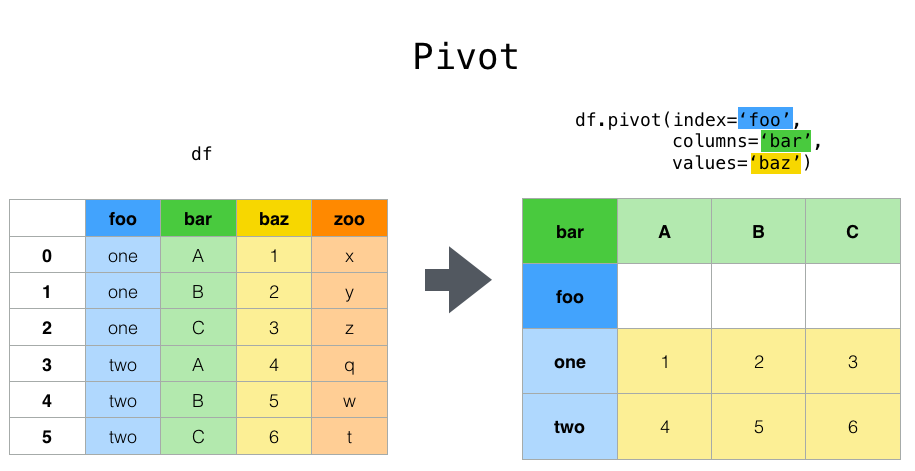

In [70]:
df = pd.DataFrame({"Region":['North', 'West', 'East', 'South', 'North', 'West', 'East', 'South'],
                  "Team":['One', 'One', 'One', 'One', 'Two', 'Two', 'Two', 'Two'],
                  "Squad":['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                  "Revenue":[7500, 5500, 2750, 6400, 2300, 3750, 1900, 575],
                  "Cost":[5200, 5100, 4400, 5300, 1250, 1300, 2100, 50]})
df

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,One,B,5500,5100
2,East,One,C,2750,4400
3,South,One,D,6400,5300
4,North,Two,E,2300,1250
5,West,Two,F,3750,1300
6,East,Two,G,1900,2100
7,South,Two,H,575,50


In [71]:
df.pivot(index='Region', columns='Team', values='Revenue')

Team,One,Two
Region,,
East,2750,1900
North,7500,2300
South,6400,575
West,5500,3750


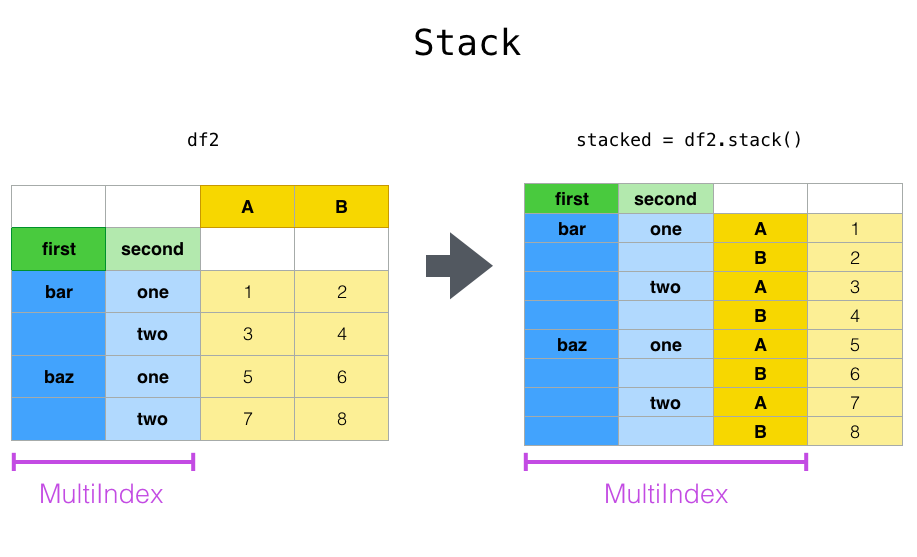

In [73]:
df2 = df.set_index(['Region', 'Team'])

In [74]:
stacked = pd.DataFrame(df2.stack())
stacked

0
Region Team              
North  One  Squad       A
            Revenue  7500
            Cost     5200
West   One  Squad       B
            Revenue  5500
            Cost     5100
East   One  Squad       C
            Revenue  2750
            Cost     4400
South  One  Squad       D
            Revenue  6400
            Cost     5300
North  Two  Squad       E
            Revenue  2300
            Cost     1250
West   Two  Squad       F
            Revenue  3750
            Cost     1300
East   Two  Squad       G
            Revenue  1900
            Cost     2100
South  Two  Squad       H
            Revenue   575
            Cost       50

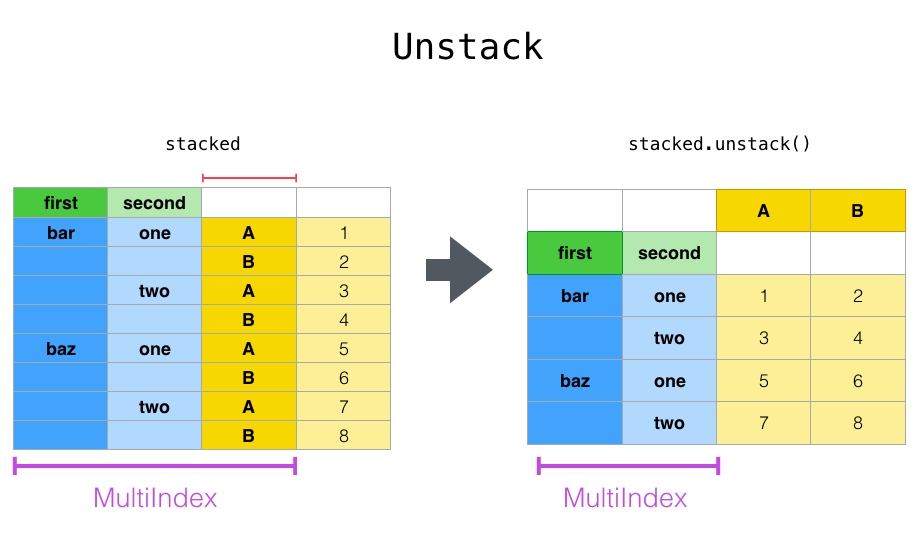

In [76]:
stacked.unstack('Region')

0                  
Region        East North South  West
Team                                
One  Squad       C     A     D     B
     Revenue  2750  7500  6400  5500
     Cost     4400  5200  5300  5100
Two  Squad       G     E     H     F
     Revenue  1900  2300   575  3750
     Cost     2100  1250    50  1300

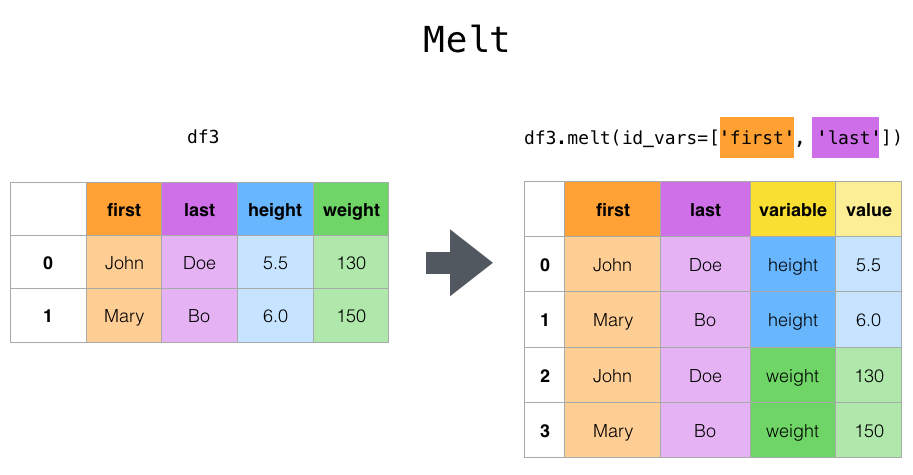

In [77]:
df.head(3)

,Region,Team,Squad,Revenue,Cost
0,North,One,A,7500,5200
1,West,One,B,5500,5100
2,East,One,C,2750,4400


In [78]:
df.melt(id_vars=['Region', 'Team'], var_name='value type')

,Region,Team,value type,value
0,North,One,Squad,A
1,West,One,Squad,B
2,East,One,Squad,C
3,South,One,Squad,D
4,North,Two,Squad,E
5,West,Two,Squad,F
6,East,Two,Squad,G
7,South,Two,Squad,H
8,North,One,Revenue,7500
9,West,One,Revenue,5500


In [79]:
df.pivot_table(index='Team', columns='Region', values='Revenue')

Region,East,North,South,West
Team,,,,
One,2750,7500,6400,5500
Two,1900,2300,575,3750


Merging DataFrames

In [80]:
df1 = pd.DataFrame({'letter':['A', 'B', 'C', 'D'],
                    'number':[1, 2, 3, 4]})
df2 = pd.DataFrame({'letter':['C', 'D', 'E', 'F'],
                    'number':[3, 4, 5, 6]})

Left Join
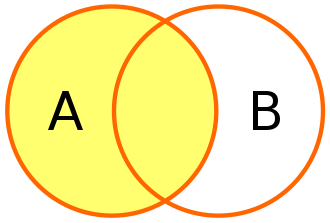

In [81]:
df1.merge(df2, how='left', on='number')

,letter_x,number,letter_y
0,A,1,NaN
1,B,2,NaN
2,C,3,C
3,D,4,D


Inner Join
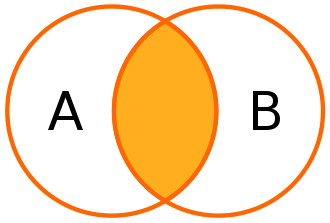

In [82]:
df1.merge(df2, how='inner', left_on='number', right_on='number')

,letter_x,number,letter_y
0,C,3,C
1,D,4,D


Right Join
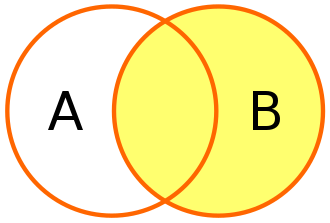

In [83]:
df1.merge(df2, how='right', on='number', suffixes=('', '_right'))

,letter,number,letter_right
0,C,3,C
1,D,4,D
2,NaN,5,E
3,NaN,6,F


In [84]:
df3 = pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True)
df3

,letter,number
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6


In [85]:
df4 = pd.concat([df1, df2], axis=1)
df4

,letter,number,letter,number
0,A,1,C,3
1,B,2,D,4
2,C,3,E,5
3,D,4,F,6


In [86]:
new_row = pd.Series(['Z', 26], index=df3.columns)
df3.append(new_row, ignore_index=True)

,letter,number
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6
6,Z,26


In [87]:
join_df = pd.DataFrame({'letter':['F', 'G', 'H', 'I'],
                        'number':[6, 7, 8, 9]})

In [88]:
df2.join(join_df, rsuffix='_right')

,letter,number,letter_right,number_right
0,C,3,F,6
1,D,4,G,7
2,E,5,H,8
3,F,6,I,9


Categorizing and Labeling Data

In [89]:
df = pd.DataFrame({"Species":['Chinook', 'Chum', 'Coho', 'Steelhead', 'Bull Trout'],
                   "Population":['Skokomish', 'Lower Skokomish', 'Skokomish', 'Skokomish', 'SF Skokomish'],
                   "Count":[1208, 2396, 3220, 6425, 8216]})
df

,Species,Population,Count
0,Chinook,Skokomish,1208
1,Chum,Lower Skokomish,2396
2,Coho,Skokomish,3220
3,Steelhead,Skokomish,6425
4,Bull Trout,SF Skokomish,8216


Binning Numerical Data with `pd.cut`

In [90]:
import numpy as np
bins = [0, 2000, 4000, 6000, 8000, np.inf]
labels = ['Low Return', 'Below Avg Return', 'Avg Return', 'Above Avg Return', 'High Return']

In [91]:
df['Count Category'] = pd.cut(df['Count'], bins, labels=labels)
df

,Species,Population,Count,Count Category
0,Chinook,Skokomish,1208,Low Return
1,Chum,Lower Skokomish,2396,Below Avg Return
2,Coho,Skokomish,3220,Below Avg Return
3,Steelhead,Skokomish,6425,Above Avg Return
4,Bull Trout,SF Skokomish,8216,High Return


Map Species to Endangered Status

In [92]:
fed_status = {"Chinook":"Threatened",
              "Chum":"Not Warranted",
              "Coho":"Not Warranted",
              "Steelhead":"Threatened"}

In [94]:
df['Federal Status'] = df['Species'].map(fed_status)
df

,Species,Population,Count,Count Category,Federal Status
0,Chinook,Skokomish,1208,Low Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
3,Steelhead,Skokomish,6425,Above Avg Return,Threatened
4,Bull Trout,SF Skokomish,8216,High Return,NaN


In [95]:
df['Count Category'] = pd.Categorical(df['Count Category'],
                                      ordered=True,
                                      categories=labels)
df['Count Category']

0          Low Return
1    Below Avg Return
2    Below Avg Return
3    Above Avg Return
4         High Return
Name: Count Category, dtype: category
Categories (5, object): ['Low Return' < 'Below Avg Return' < 'Avg Return' < 'Above Avg Return' <
                         'High Return']

In [96]:
df.sort_values(by=['Count Category'], ascending=False)

,Species,Population,Count,Count Category,Federal Status
4,Bull Trout,SF Skokomish,8216,High Return,NaN
3,Steelhead,Skokomish,6425,Above Avg Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
0,Chinook,Skokomish,1208,Low Return,Threatened


In [97]:
pd.get_dummies(df['Count Category'])

,Low Return,Below Avg Return,Avg Return,Above Avg Return,High Return
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


Plotting with Pandas

In [98]:
import numpy as np
daterange = pd.period_range('1/1/1950', freq='1d', periods=50)
date_df = pd.DataFrame(data=daterange, columns=['day'])
date_df['value1'] = np.random.randint(45, 65, size=(len(date_df)))
date_df['value2'] = np.random.randint(25, 35, size=(len(date_df)))
date_df.head(3)

,day,value1,value2
0,1950-01-01,52,30
1,1950-01-02,61,33
2,1950-01-03,59,25


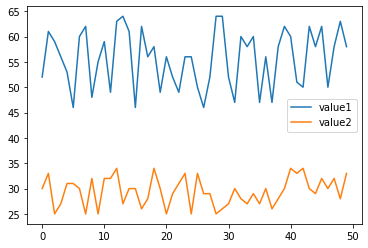

In [99]:
ax = date_df.plot();

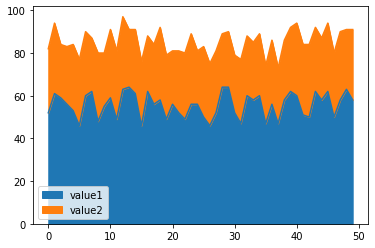

In [101]:
date_df.plot.area(stacked=True);

In [102]:
iris = pd.read_csv('iris.csv')

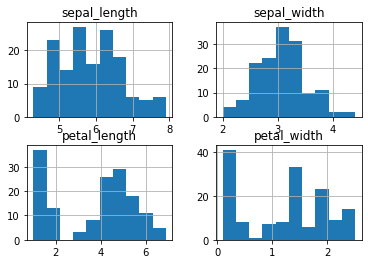

In [103]:
iris.hist();

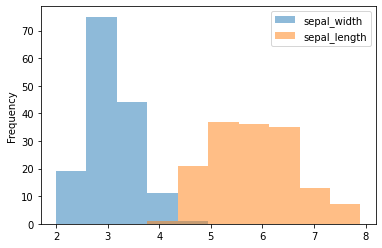

In [104]:
iris[['sepal_width', 'sepal_length']].plot.hist(alpha=0.5);

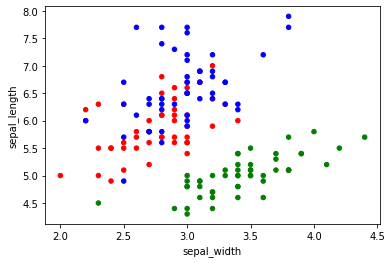

In [105]:
colors = {"versicolor":"red", "setosa":"green", "virginica":"blue"}
iris['colors'] = iris['species'].map(colors)
iris.plot.scatter(x='sepal_width', y='sepal_length', color=iris['colors']);

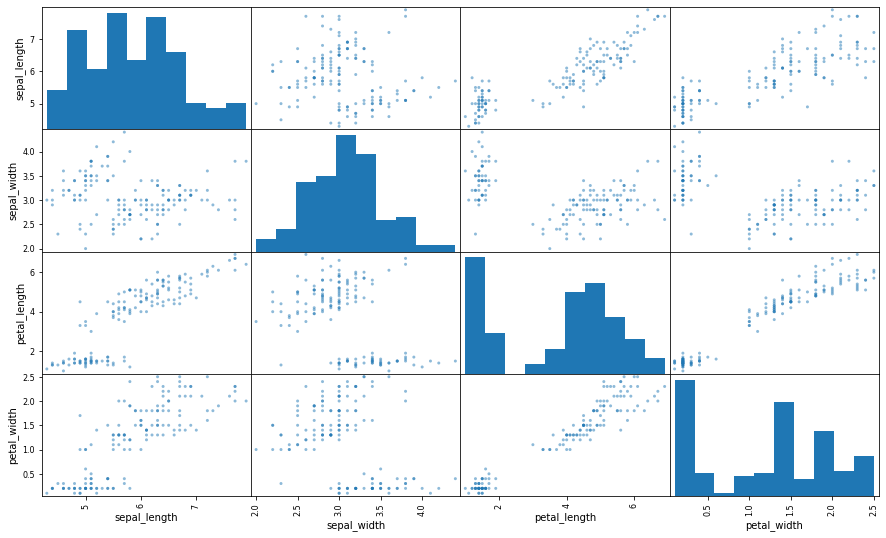

In [106]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize=(15, 9),);

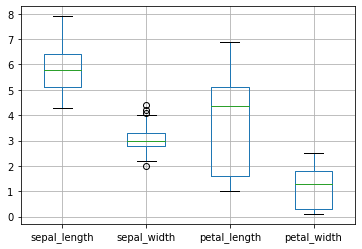

In [107]:
iris.boxplot();

In [108]:
iris.corr().style.background_gradient(cmap='RdYlGn', axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000
